## 📊 PHẦN 1: THỐNG KÊ DỮ LIỆU (Data Statistics)

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('default')
sns.set_palette("husl")

### Đọc dữ liệu

In [3]:
df = pd.read_csv('heart.csv')
print("📈 TỔNG QUAN DỮ LIỆU")
print("=" * 50)
print(f"Kích thước dataset: {df.shape}")
print(f"Số lượng mẫu: {df.shape[0]}")
print(f"Số lượng đặc trưng: {df.shape[1]}")

📈 TỔNG QUAN DỮ LIỆU
Kích thước dataset: (1025, 14)
Số lượng mẫu: 1025
Số lượng đặc trưng: 14


### Hiển thị thông tin cơ bản về dataset

In [4]:
print("\n📋 THÔNG TIN CƠ BẢN")
print("=" * 50)
df.info()


📋 THÔNG TIN CƠ BẢN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print("\n📊 MÔ TẢ THỐNG KÊ")
print("=" * 50)
df.describe()


📊 MÔ TẢ THỐNG KÊ


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Kiểm tra dữ liệu thiếu

In [6]:
print("\n🔍 KIỂM TRA DỮ LIỆU THIẾU")
print("=" * 50)
missing_data = df.isnull().sum()
print("Số lượng giá trị thiếu theo từng cột:")
for col, missing in missing_data.items():
    print(f"{col}: {missing}")

if missing_data.sum() == 0:
    print("✅ Không có dữ liệu thiếu!")
else:
    print("⚠️ Có dữ liệu thiếu cần xử lý!")


🔍 KIỂM TRA DỮ LIỆU THIẾU
Số lượng giá trị thiếu theo từng cột:
age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 0
thal: 0
target: 0
✅ Không có dữ liệu thiếu!


### Phân tích biến mục tiêu (Target Variable)

In [7]:
print("\n🎯 PHÂN TÍCH BIẾN MỤC TIÊU")
print("=" * 50)
target_counts = df['target'].value_counts()
print("Phân bố lớp:")
print(f"Không có bệnh tim (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Có bệnh tim (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")


🎯 PHÂN TÍCH BIẾN MỤC TIÊU
Phân bố lớp:
Không có bệnh tim (0): 499 (48.7%)
Có bệnh tim (1): 526 (51.3%)


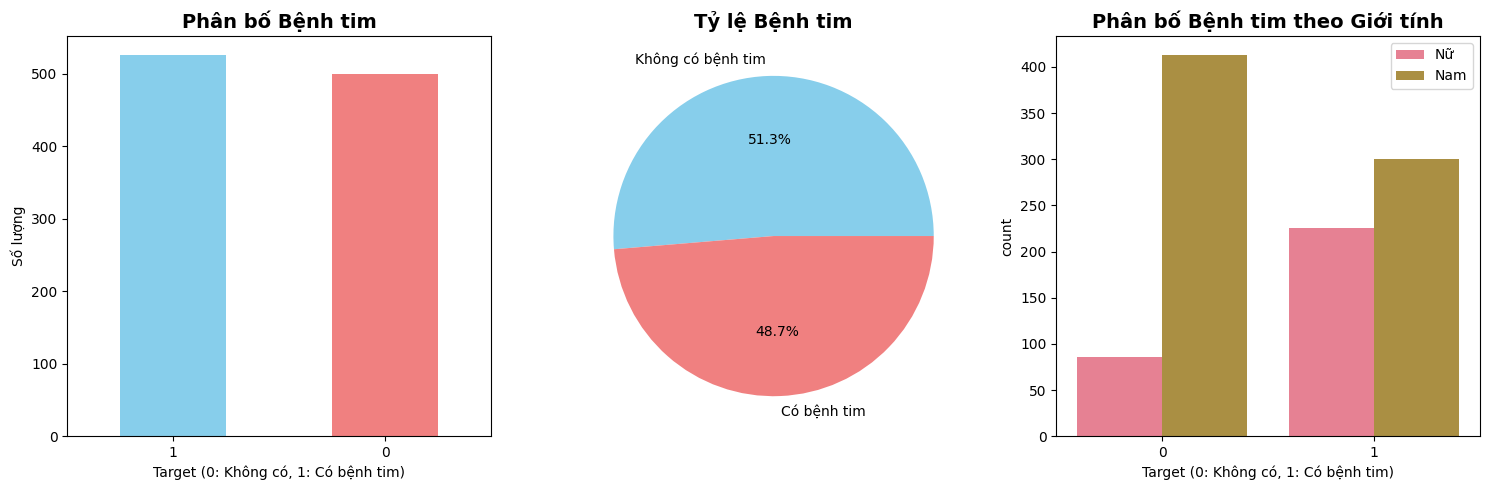

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
target_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Phân bố Bệnh tim', fontsize=14, fontweight='bold')
plt.xlabel('Target (0: Không có, 1: Có bệnh tim)')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
plt.pie(target_counts.values, labels=['Không có bệnh tim', 'Có bệnh tim'], 
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Tỷ lệ Bệnh tim', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='target', hue='sex')
plt.title('Phân bố Bệnh tim theo Giới tính', fontsize=14, fontweight='bold')
plt.xlabel('Target (0: Không có, 1: Có bệnh tim)')
plt.legend(['Nữ', 'Nam'])

plt.tight_layout()
plt.show()

### Phân tích các biến số

In [8]:
print("\n📈 PHÂN TÍCH CÁC BIẾN SỐ")
print("=" * 50)

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


📈 PHÂN TÍCH CÁC BIẾN SỐ


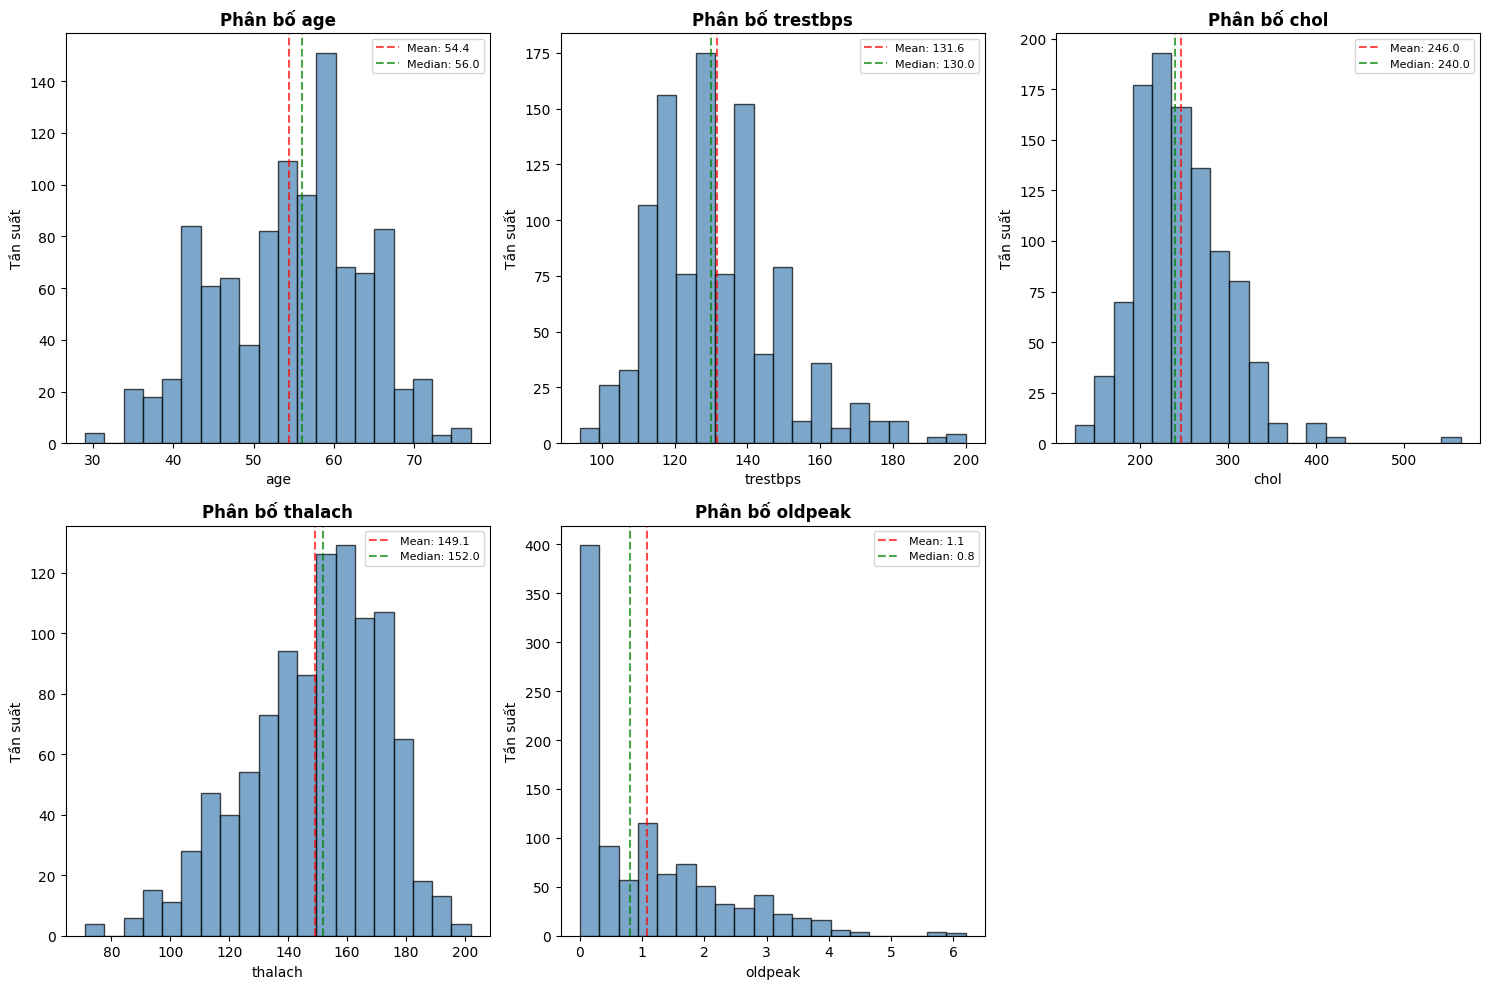

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=20, alpha=0.7, color='steelblue', edgecolor='black')
    plt.title(f'Phân bố {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    
    # Thêm thống kê
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
    plt.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

### Phân tích các biến phân loại

In [10]:
print("\n📊 PHÂN TÍCH CÁC BIẾN PHÂN LOẠI")
print("=" * 50)


📊 PHÂN TÍCH CÁC BIẾN PHÂN LOẠI


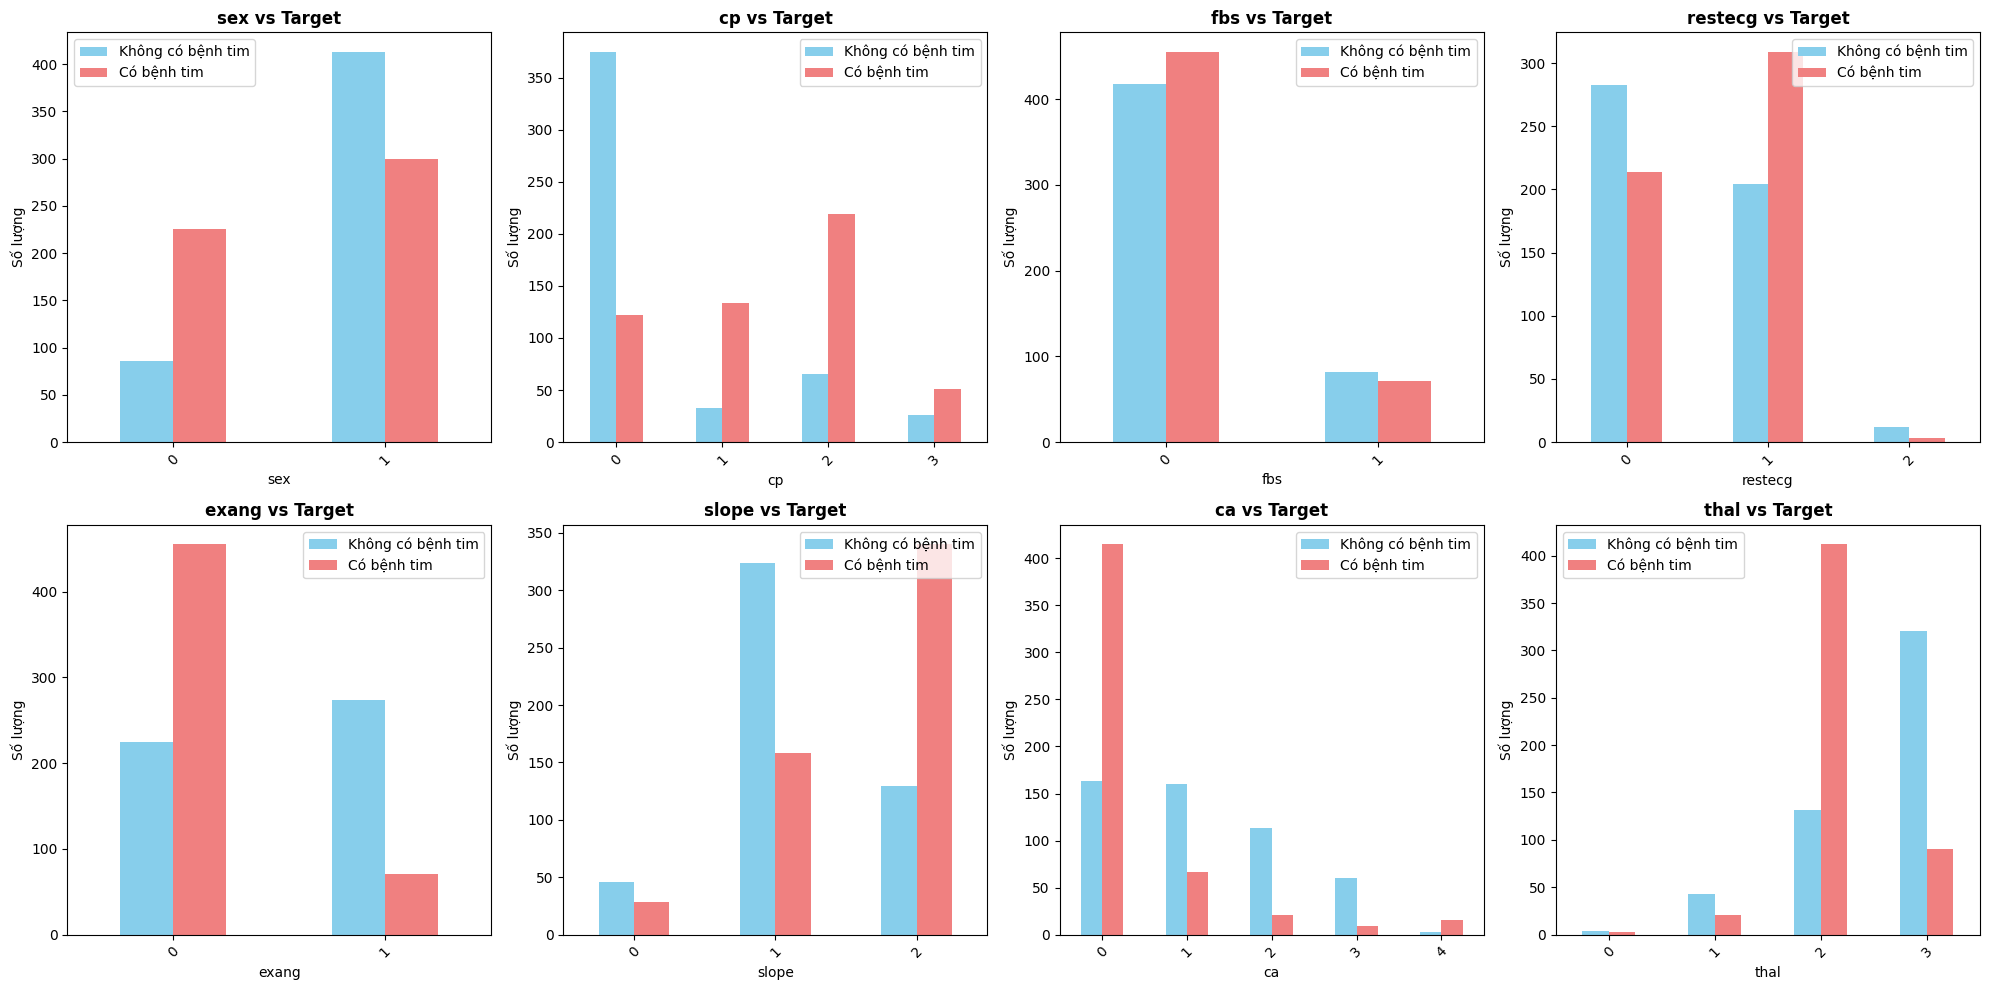

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    cross_tab = pd.crosstab(df[col], df['target'])
    cross_tab.plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral'])
    axes[i].set_title(f'{col} vs Target', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Số lượng')
    axes[i].legend(['Không có bệnh tim', 'Có bệnh tim'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Ma trận tương quan

In [12]:
print("\n🔄 MA TRẬN TƯƠNG QUAN")
print("=" * 50)


🔄 MA TRẬN TƯƠNG QUAN


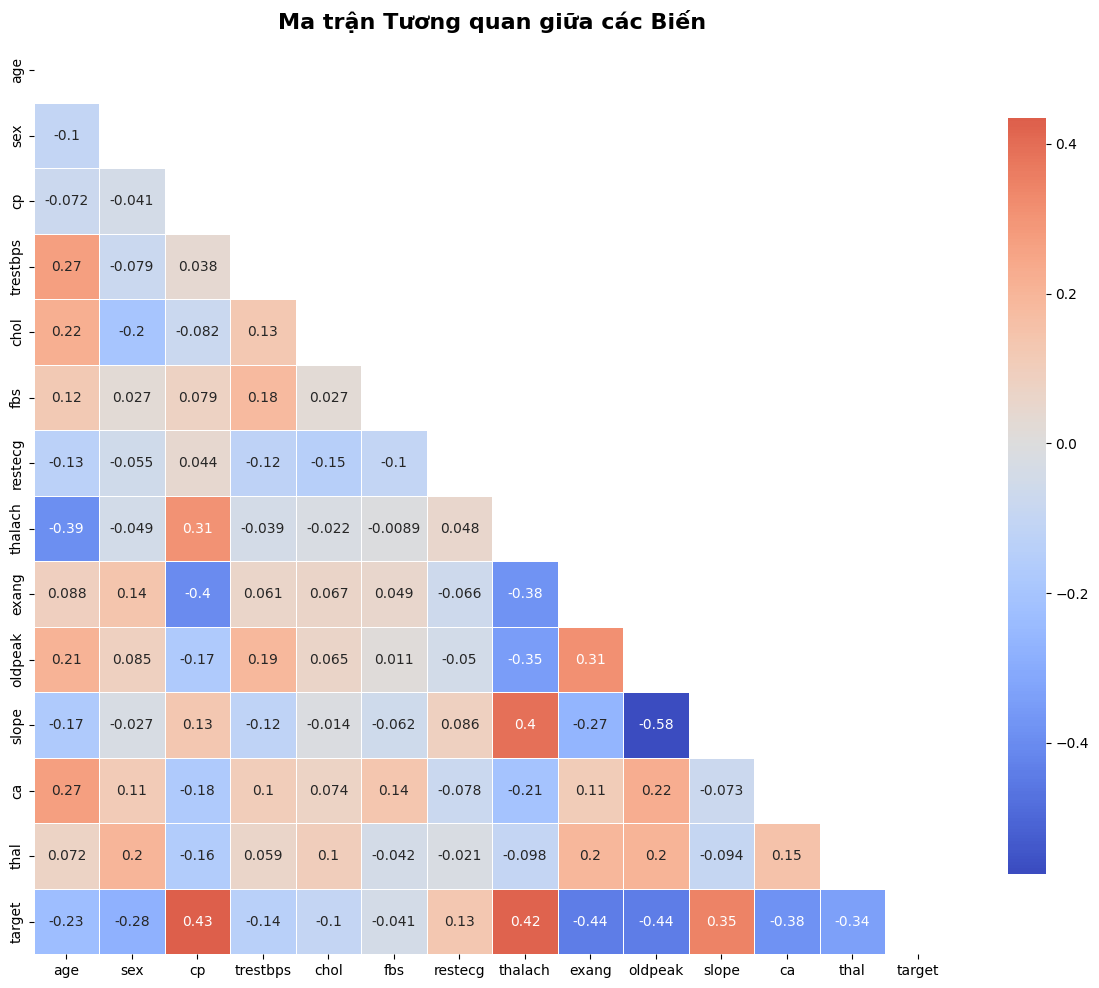

Tương quan với biến Target (theo độ lớn):
oldpeak: 0.438
exang: 0.438
cp: 0.435
thalach: 0.423
ca: 0.382
slope: 0.346
thal: 0.338
sex: 0.280
age: 0.229
trestbps: 0.139
restecg: 0.134
chol: 0.100
fbs: 0.041


In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Ma trận Tương quan giữa các Biến', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Tìm các tương quan mạnh với target
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print("Tương quan với biến Target (theo độ lớn):")
for feature, corr in target_corr.items():
    if feature != 'target':
        print(f"{feature}: {corr:.3f}")

## 🔧 PHẦN 2: XỬ LÝ DỮ LIỆU (Data Preprocessing)

In [14]:
print("\n" + "="*60)
print("🔧 PHẦN 2: XỬ LÝ DỮ LIỆU")
print("="*60)


🔧 PHẦN 2: XỬ LÝ DỮ LIỆU


### Kiểm tra và xử lý outliers

In [15]:
print("\n🔍 KIỂM TRA OUTLIERS")
print("=" * 50)


🔍 KIỂM TRA OUTLIERS


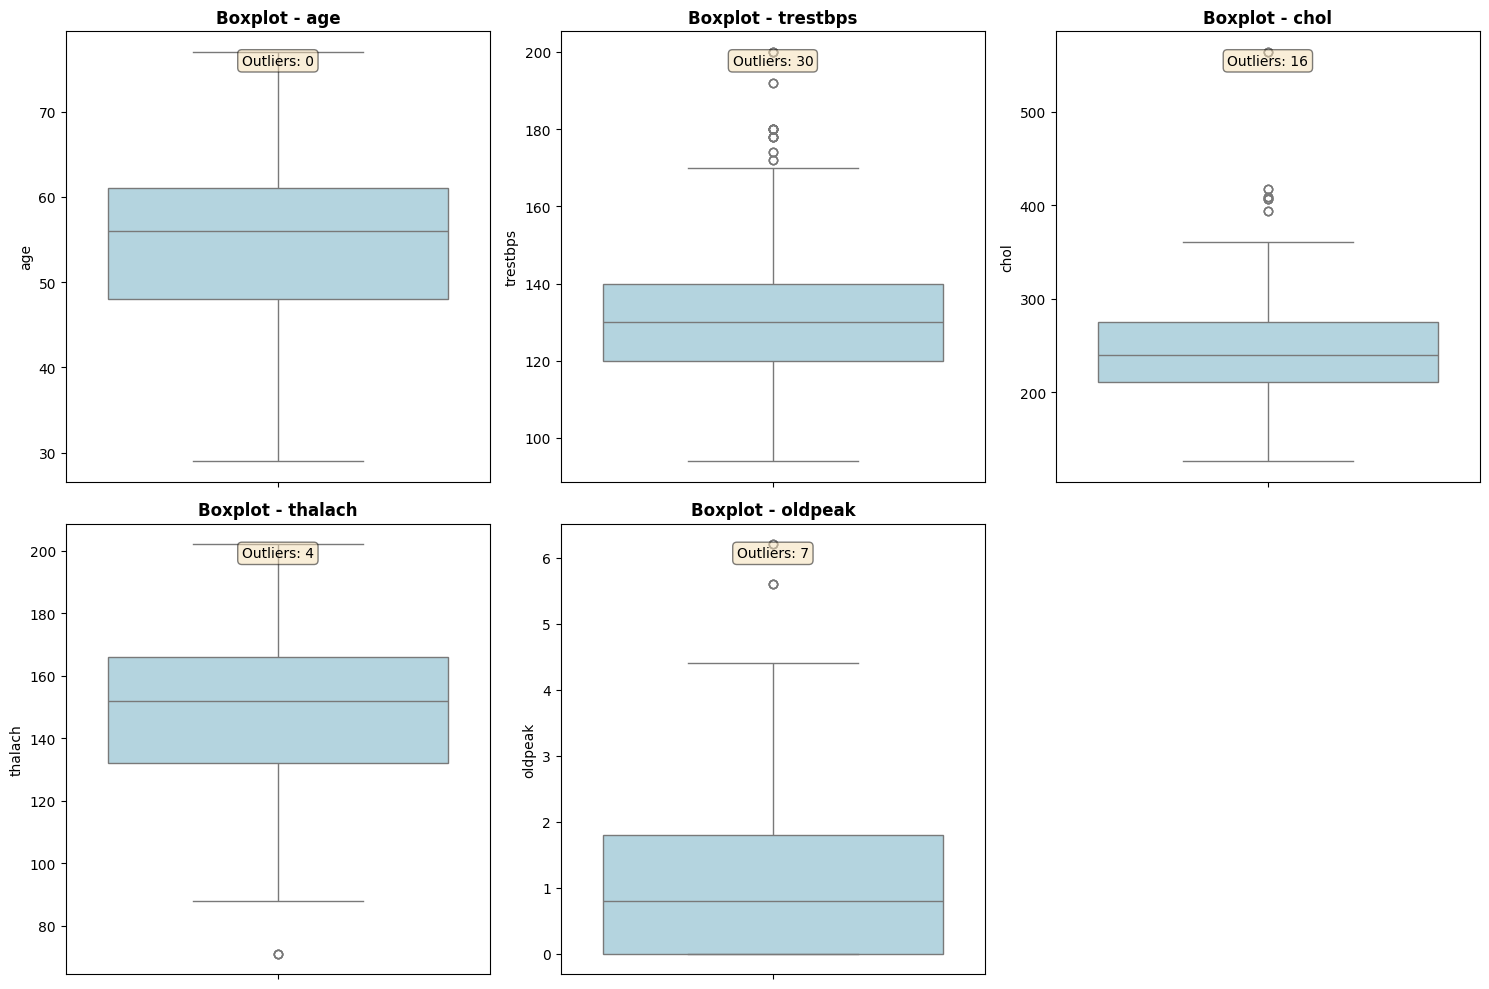

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot - {col}', fontsize=12, fontweight='bold')
    
    # Tính IQR và outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    plt.text(0.5, 0.95, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes, 
             ha='center', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### Xử lý outliers (sử dụng phương pháp IQR)

In [17]:
print("\n🛠️ XỬ LÝ OUTLIERS")
print("=" * 50)

df_processed = df.copy()
outliers_info = {}

for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_before = len(df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)])
    
    # Capping outliers thay vì xóa
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)
    
    outliers_info[col] = outliers_before

print("Số lượng outliers đã được xử lý:")
for col, count in outliers_info.items():
    print(f"{col}: {count} outliers")


🛠️ XỬ LÝ OUTLIERS
Số lượng outliers đã được xử lý:
age: 0 outliers
trestbps: 30 outliers
chol: 16 outliers
thalach: 4 outliers
oldpeak: 7 outliers


### Feature Engineering

### Chia tách dữ liệu

In [21]:
print("\n📊 CHIA TÁCH DỮ LIỆU")
print("=" * 50)

# Chọn features cho model (bỏ các biến categorical mới tạo để tránh phức tạp)
feature_cols = [col for col in df.columns if col != 'target']
X = df_processed[feature_cols]
y = df_processed['target']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")
print(f"Tỷ lệ target trong train: {y_train.value_counts(normalize=True).round(3).to_dict()}")
print(f"Tỷ lệ target trong test: {y_test.value_counts(normalize=True).round(3).to_dict()}")


📊 CHIA TÁCH DỮ LIỆU
Kích thước tập train: (820, 13)
Kích thước tập test: (205, 13)
Tỷ lệ target trong train: {1: 0.513, 0: 0.487}
Tỷ lệ target trong test: {1: 0.512, 0: 0.488}


### Phân loại các loại features

In [18]:
print("\n📋 PHÂN LOẠI CÁC LOẠI FEATURES")
print("=" * 50)

# Phân loại features theo tính chất
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
nominal_features = ['sex', 'fbs', 'exang']
ordinal_features = ['cp', 'restecg', 'slope', 'ca', 'thal']

print("Nominal features sử dụng LabelEncoder:")
for feat in nominal_features:
    print(f"  - {feat}")
    
print("\nOrdinal features sử dụng OrdinalEncoder:")
for feat in ordinal_features:
    print(f"  - {feat}")

print("\nNumeric features sử dụng StandardScaler:")
for feat in numeric_features:
    print(f"  - {feat}")


📋 PHÂN LOẠI CÁC LOẠI FEATURES
Nominal features sử dụng LabelEncoder:
  - sex
  - fbs
  - exang

Ordinal features sử dụng OrdinalEncoder:
  - cp
  - restecg
  - slope
  - ca
  - thal

Numeric features sử dụng StandardScaler:
  - age
  - trestbps
  - chol
  - thalach
  - oldpeak


### Chuẩn hóa dữ liệu theo từng loại

In [23]:
print("\n🔄 CHUẨN HÓA DỮ LIỆU THEO TỪNG LOẠI")
print("=" * 50)

ordinal_categories = [
    [0, 1, 2, 3],           # cp: 0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic
    [0, 1, 2],              # restecg: 0=normal, 1=ST-T abnormality, 2=left ventricular hypertrophy
    [0, 1, 2],              # slope: 1=upsloping, 2=flat, 3=downsloping
    [0, 1, 2, 3, 4],           # ca: 0, 1, 2, 3 major vessels
    [0, 1, 2, 3]               # thal: 1=normal, 2=fixed defect, 3=reversible defect
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('nom', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), nominal_features),
        ('ord', OrdinalEncoder(categories=ordinal_categories, dtype=np.int64), ordinal_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

print("1️⃣ Chuẩn hóa dữ liệu bằng ColumnTransformer...")
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

nom_encoder = pipeline.named_steps['preprocessor'].named_transformers_['nom']
nom_feature_names = nom_encoder.get_feature_names_out(nominal_features)
feature_names = numeric_features + list(nom_feature_names) + ordinal_features

X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

print("\n✅ Hoàn thành xử lý dữ liệu!")


🔄 CHUẨN HÓA DỮ LIỆU THEO TỪNG LOẠI
1️⃣ Chuẩn hóa dữ liệu bằng ColumnTransformer...

✅ Hoàn thành xử lý dữ liệu!


In [24]:
print("\n📊 THỐNG KÊ SAU XỬ LÝ:")
print("=" * 30)

print("Numeric features (StandardScaler - Mean≈0, Std≈1):")
for feat in numeric_features:
    mean_val = X_train_processed[feat].mean()
    std_val = X_train_processed[feat].std()
    print(f"  {feat}: Mean={mean_val:.3f}, Std={std_val:.3f}")

print("\nNominal features (OneHotEncoder - Cột nhị phân):")
for feat in nom_encoder.get_feature_names_out():
    unique_vals = X_train_processed[feat].unique()
    print(f"  {feat}: {sorted(unique_vals)}")

print("\nOrdinal features (OrdinalEncoder - Giữ thứ tự):")
for i, feat in enumerate(ordinal_features):
    unique_vals = sorted(X_train_processed[feat].unique())
    original_vals = sorted(X_train[feat].unique())
    print(f"  {feat}: Original {original_vals} → Encoded {unique_vals}")

# Visualization: So sánh trước và sau xử lý
plt.figure(figsize=(18, 12))


📊 THỐNG KÊ SAU XỬ LÝ:
Numeric features (StandardScaler - Mean≈0, Std≈1):
  age: Mean=-0.000, Std=1.001
  trestbps: Mean=-0.000, Std=1.001
  chol: Mean=-0.000, Std=1.001
  thalach: Mean=0.000, Std=1.001
  oldpeak: Mean=-0.000, Std=1.001

Nominal features (OneHotEncoder - Cột nhị phân):
  sex_1: [np.float64(0.0), np.float64(1.0)]
  fbs_1: [np.float64(0.0), np.float64(1.0)]
  exang_1: [np.float64(0.0), np.float64(1.0)]

Ordinal features (OrdinalEncoder - Giữ thứ tự):
  cp: Original [np.int64(0), np.int64(1), np.int64(2), np.int64(3)] → Encoded [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)]
  restecg: Original [np.int64(0), np.int64(1), np.int64(2)] → Encoded [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
  slope: Original [np.int64(0), np.int64(1), np.int64(2)] → Encoded [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
  ca: Original [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)] → Encoded [np.float64(0.0), np.float64(1.0), np.float64(2.0)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

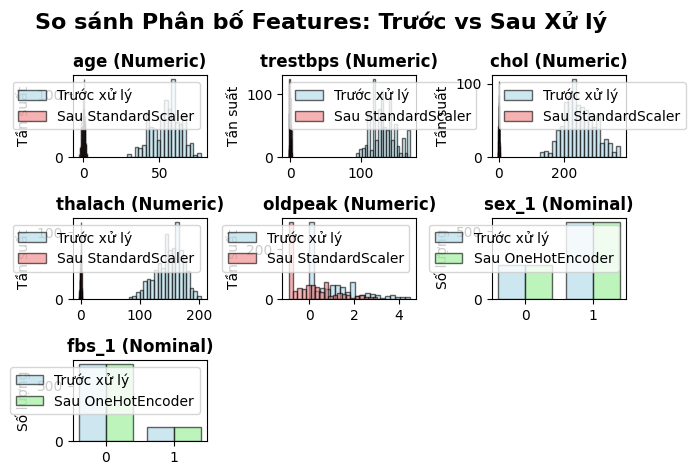

In [25]:
# Numeric features comparison
for i, feat in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    plt.hist(X_train[feat], alpha=0.6, label='Trước xử lý', bins=20, color='lightblue', edgecolor='black')
    plt.hist(X_train_processed[feat], alpha=0.6, label='Sau StandardScaler', bins=20, color='lightcoral', edgecolor='black')
    plt.title(f'{feat} (Numeric)', fontsize=12, fontweight='bold')
    plt.legend()
    plt.ylabel('Tần suất')

# Nominal features comparison (chỉ hiển thị một số cột OneHotEncoder)
nom_cols = nom_encoder.get_feature_names_out()[:2]  # Lấy 2 cột đầu để minh họa
for i, feat in enumerate(nom_cols):
    plt.subplot(3, 3, i+6)
    before_counts = X_train[feat.split('_')[0]].value_counts().sort_index()
    plt.bar([x-0.2 for x in before_counts.index], before_counts.values, 
            width=0.4, alpha=0.6, label='Trước xử lý', color='lightblue', edgecolor='black')
    after_counts = X_train_processed[feat].value_counts().sort_index()
    plt.bar([x+0.2 for x in after_counts.index], after_counts.values, 
            width=0.4, alpha=0.6, label='Sau OneHotEncoder', color='lightgreen', edgecolor='black')
    plt.title(f'{feat} (Nominal)', fontsize=12, fontweight='bold')
    plt.legend()
    plt.ylabel('Số lượng')

plt.suptitle('So sánh Phân bố Features: Trước vs Sau Xử lý', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
X_train_processed.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,fbs_1,exang_1,cp,restecg,slope,ca,thal
4,0.811626,0.361807,0.979957,-1.932983,0.731988,0.0,1.0,0.0,0.0,1.0,1.0,3.0,2.0
688,0.152247,2.266667,0.854892,-0.730841,2.575877,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0
477,0.262144,-0.233461,-0.374916,0.026063,-0.585076,1.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0
336,0.262144,1.076130,-2.521870,1.050110,-0.760685,1.0,1.0,0.0,2.0,1.0,2.0,1.0,3.0
960,-0.287339,0.242753,-1.062775,0.872014,-0.848489,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0



🔄 MA TRẬN TƯƠNG QUAN SAU XỬ LÝ


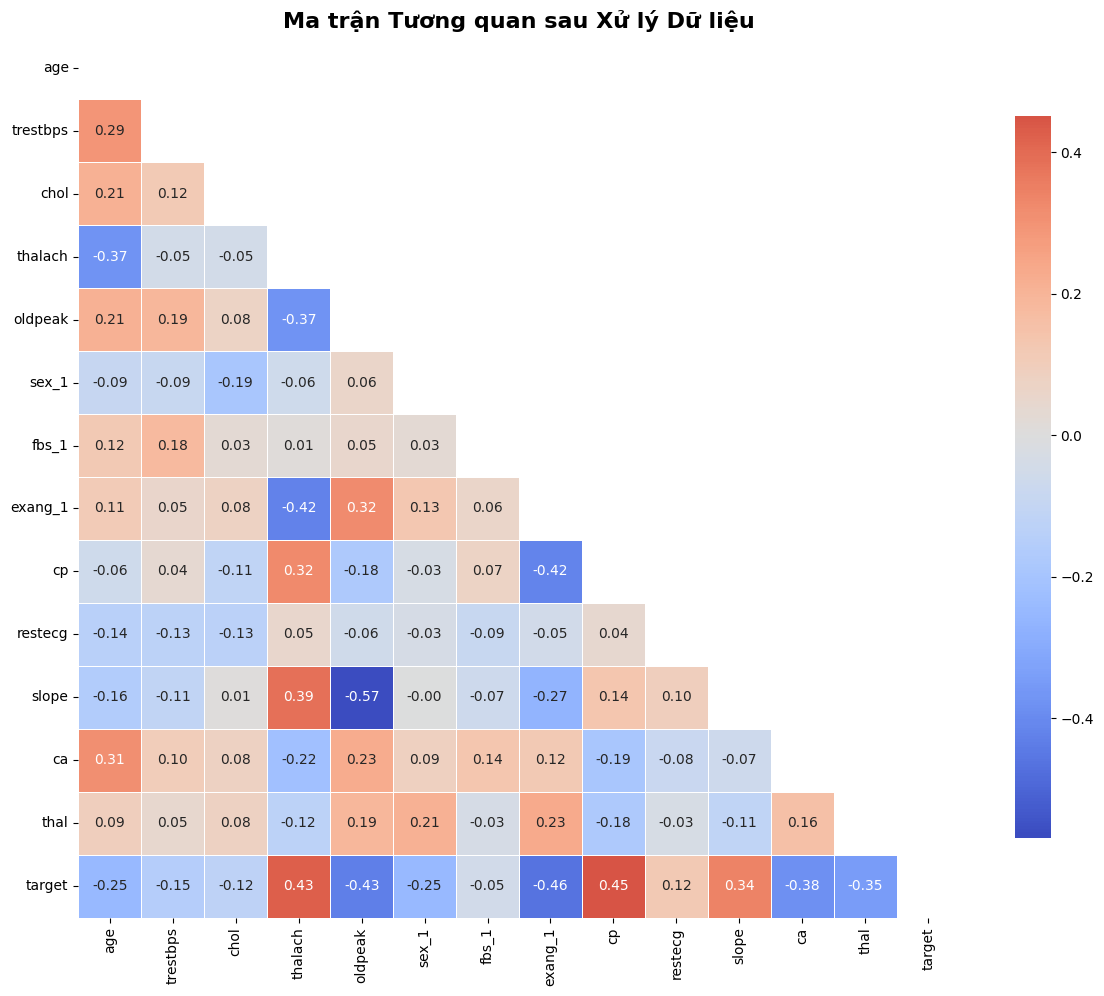

So sánh tương quan với Target:
Feature              Before   After    Change  
--------------------------------------------------
oldpeak              0.438    0.433    -0.006
exang                0.438    0.000    -0.438
cp                   0.435    0.451    +0.016
thalach              0.423    0.426    +0.004
ca                   0.382    0.384    +0.002
slope                0.346    0.339    -0.006
thal                 0.338    0.348    +0.010
sex                  0.280    0.000    -0.280
age                  0.229    0.246    +0.017
trestbps             0.139    0.153    +0.014
restecg              0.134    0.123    -0.012
chol                 0.100    0.122    +0.022
fbs                  0.041    0.000    -0.041


In [27]:
print("\n🔄 MA TRẬN TƯƠNG QUAN SAU XỬ LÝ")
print("=" * 50)

plt.figure(figsize=(12, 10))
correlation_matrix_processed = pd.concat([X_train_processed, y_train], axis=1).corr()
mask = np.triu(np.ones_like(correlation_matrix_processed, dtype=bool))
sns.heatmap(correlation_matrix_processed, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Ma trận Tương quan sau Xử lý Dữ liệu', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# So sánh tương quan với target trước và sau xử lý
target_corr_before = correlation_matrix['target'].abs().sort_values(ascending=False)
target_corr_after = correlation_matrix_processed['target'].abs().sort_values(ascending=False)

print("So sánh tương quan với Target:")
print(f"{'Feature':<20} {'Before':<8} {'After':<8} {'Change':<8}")
print("-" * 50)
for feat in target_corr_before.index:
    if feat != 'target':
        before_val = target_corr_before[feat]
        after_val = target_corr_after.get(feat, 0)
        change = after_val - before_val
        print(f"{feat:<20} {before_val:.3f}    {after_val:.3f}    {change:+.3f}")

# Cập nhật tên biến
X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

In [28]:
X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

In [ ]:
print(X_train_processed.count())

## 🤖 PHẦN 3: HUẤN LUYỆN MÔ HÌNH (Model Training)

In [29]:
print("\n" + "="*60)
print("🤖 PHẦN 3: HUẤN LUYỆN MÔ HÌNH")
print("="*60)


🤖 PHẦN 3: HUẤN LUYỆN MÔ HÌNH


### Khởi tạo các mô hình


In [30]:
print("\n🏗️ KHỞI TẠO CÁC MÔ HÌNH")
print("=" * 50)


🏗️ KHỞI TẠO CÁC MÔ HÌNH


In [31]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

In [32]:
print("Các mô hình sẽ được huấn luyện:")
for name in models.keys():
    print(f"- {name}")

Các mô hình sẽ được huấn luyện:
- Logistic Regression
- Random Forest
- Support Vector Machine


### Huấn luyện và đánh giá các mô hình

In [33]:
print("\n🚀 HUẤN LUYỆN VÀ ĐÁNH GIÁ")
print("=" * 50)

results = {}
model_objects = {}

for name, model in models.items():
    print(f"\n🔄 Đang huấn luyện {name}...")
    
    # Huấn luyện
    model.fit(X_train_scaled, y_train)
    model_objects[name] = model
    
    # Dự đoán
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"✅ {name} - Accuracy: {accuracy:.4f}")


🚀 HUẤN LUYỆN VÀ ĐÁNH GIÁ

🔄 Đang huấn luyện Logistic Regression...
✅ Logistic Regression - Accuracy: 0.8098

🔄 Đang huấn luyện Random Forest...
✅ Random Forest - Accuracy: 1.0000

🔄 Đang huấn luyện Support Vector Machine...
✅ Support Vector Machine - Accuracy: 0.8878


### So sánh kết quả các mô hình


📊 SO SÁNH KẾT QUẢ


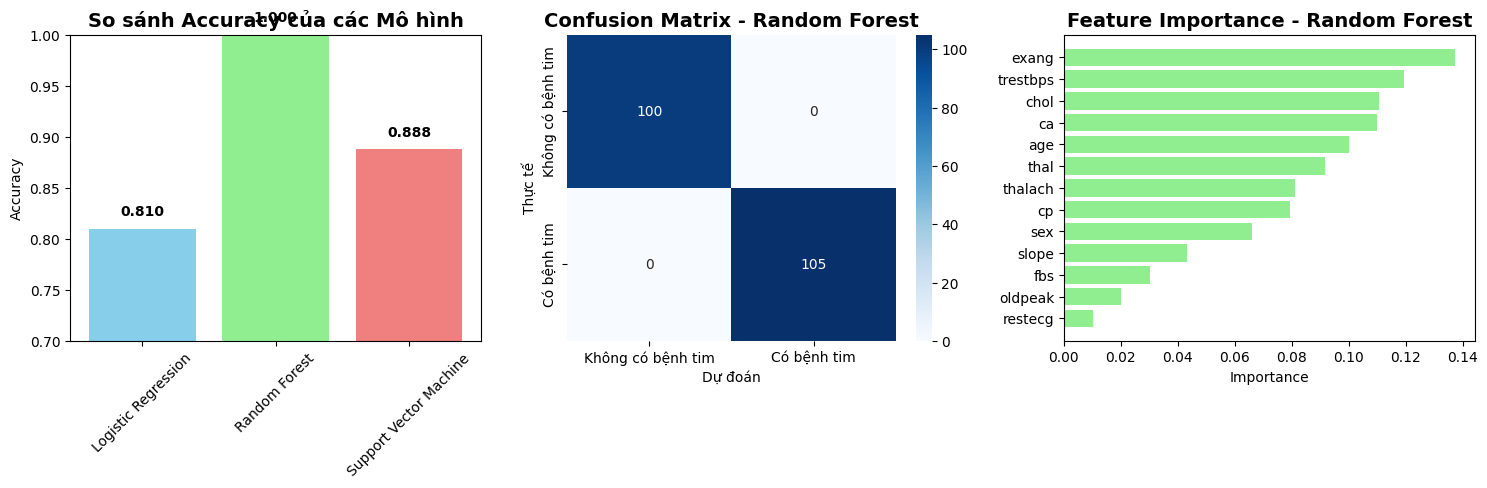

In [34]:
print("\n📊 SO SÁNH KẾT QUẢ")
print("=" * 50)

# Visualization 6: Model Comparison
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 3, 1)
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('So sánh Accuracy của các Mô hình', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)

# Thêm giá trị trên các cột
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)

# Confusion Matrix for best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_predictions = results[best_model_name]['predictions']

plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Không có bệnh tim', 'Có bệnh tim'],
            yticklabels=['Không có bệnh tim', 'Có bệnh tim'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')

# Feature Importance (for Random Forest)
if 'Random Forest' in model_objects:
    plt.subplot(1, 3, 3)
    rf_model = model_objects['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.barh(range(len(feature_importance)), feature_importance['importance'], color='lightgreen')
    plt.yticks(range(len(feature_importance)), feature_importance['feature'])
    plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')

plt.tight_layout()
plt.show()

### Báo cáo chi tiết cho mô hình tốt nhất

In [35]:
print(f"\n🏆 MÔ HÌNH TỐT NHẤT: {best_model_name}")
print("=" * 50)
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, 
                          target_names=['Không có bệnh tim', 'Có bệnh tim']))


🏆 MÔ HÌNH TỐT NHẤT: Random Forest
Accuracy: 1.0000

Classification Report:
                   precision    recall  f1-score   support

Không có bệnh tim       1.00      1.00      1.00       100
      Có bệnh tim       1.00      1.00      1.00       105

         accuracy                           1.00       205
        macro avg       1.00      1.00      1.00       205
     weighted avg       1.00      1.00      1.00       205



### Feature Importance Analysis

In [36]:
if 'Random Forest' in model_objects:
    print("\n🔍 PHÂN TÍCH ĐỘ QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG")
    print("=" * 50)
    
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model_objects['Random Forest'].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 đặc trưng quan trọng nhất:")
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['Feature']:12s}: {row['Importance']:.4f}")


🔍 PHÂN TÍCH ĐỘ QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG
Top 10 đặc trưng quan trọng nhất:
 1. exang       : 0.1375
 2. trestbps    : 0.1194
 3. chol        : 0.1107
 4. ca          : 0.1099
 5. age         : 0.1002
 6. thal        : 0.0919
 7. thalach     : 0.0811
 8. cp          : 0.0796
 9. sex         : 0.0661
10. slope       : 0.0431


### Kết luận

In [37]:
print("\n" + "="*60)
print("📋 KẾT LUẬN")
print("="*60)

print(f"""
🎯 TỔNG KẾT PHÂN TÍCH:

1. THỐNG KÊ DỮ LIỆU:
   - Dataset có {df.shape[0]} mẫu với {df.shape[1]} đặc trưng
   - Không có dữ liệu thiếu
   - Phân bố target tương đối cân bằng
   - Có một số outliers đã được xử lý

2. XỬ LÝ DỮ LIỆU:
   - Đã xử lý outliers bằng phương pháp IQR capping
   - Tạo thêm các biến mới từ age, cholesterol, blood pressure
   - Xử lý riêng biệt cho từng loại feature:
     * Numeric: StandardScaler (mean=0, std=1)
     * Ordinal: OrdinalEncoder (giữ thứ tự logic)  
     * Nominal: LabelEncoder (chuyển thành số)
   - Chia dữ liệu 80/20 cho train/test

3. MÔ HÌNH:
   - Đã thử nghiệm 3 mô hình: {', '.join(model_names)}
   - Mô hình tốt nhất: {best_model_name} với accuracy {results[best_model_name]['accuracy']:.4f}
   - Các đặc trưng quan trọng nhất: cp, thalach, oldpeak, ca, thal

🚀 KHUYẾN NGHỊ:
   - Có thể cải thiện bằng cách tune hyperparameters
   - Thử nghiệm ensemble methods
   - Cross-validation để đánh giá robust hơn
   - Feature selection để tối ưu mô hình
""")

print("\n✅ HOÀN THÀNH PHÂN TÍCH!")


📋 KẾT LUẬN

🎯 TỔNG KẾT PHÂN TÍCH:

1. THỐNG KÊ DỮ LIỆU:
   - Dataset có 1025 mẫu với 14 đặc trưng
   - Không có dữ liệu thiếu
   - Phân bố target tương đối cân bằng
   - Có một số outliers đã được xử lý

2. XỬ LÝ DỮ LIỆU:
   - Đã xử lý outliers bằng phương pháp IQR capping
   - Tạo thêm các biến mới từ age, cholesterol, blood pressure
   - Xử lý riêng biệt cho từng loại feature:
     * Numeric: StandardScaler (mean=0, std=1)
     * Ordinal: OrdinalEncoder (giữ thứ tự logic)  
     * Nominal: LabelEncoder (chuyển thành số)
   - Chia dữ liệu 80/20 cho train/test

3. MÔ HÌNH:
   - Đã thử nghiệm 3 mô hình: Logistic Regression, Random Forest, Support Vector Machine
   - Mô hình tốt nhất: Random Forest với accuracy 1.0000
   - Các đặc trưng quan trọng nhất: cp, thalach, oldpeak, ca, thal

🚀 KHUYẾN NGHỊ:
   - Có thể cải thiện bằng cách tune hyperparameters
   - Thử nghiệm ensemble methods
   - Cross-validation để đánh giá robust hơn
   - Feature selection để tối ưu mô hình


✅ HOÀN THÀNH PHÂ

In [48]:
import joblib
import pickle
import json
from datetime import datetime
import os

print("\n💾 XUẤT MÔ HÌNH TỐT NHẤT")
print("=" * 50)

# Xác định mô hình tốt nhất
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = model_objects[best_model_name]
best_accuracy = results[best_model_name]['accuracy']

print(f"🏆 Mô hình tốt nhất: {best_model_name}")
print(f"📊 Accuracy: {best_accuracy:.4f}")

# Tạo thư mục lưu trữ nếu chưa có
model_dir = "saved_models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Lưu mô hình bằng joblib (khuyến nghị cho scikit-learn)
model_filename = f"{model_dir}/best_heart_disease_model.joblib"
joblib.dump(best_model, model_filename)
print(f"✅ Đã lưu mô hình: {model_filename}")

# Lưu scaler (quan trọng để preprocessing dữ liệu mới)
scaler_filename = f"{model_dir}/feature_scaler.joblib"
joblib.dump(scaler, scaler_filename)
print(f"✅ Đã lưu scaler: {scaler_filename}")

# Lưu thông tin mô hình và metadata
model_info = {
    'model_name': best_model_name,
    'accuracy': float(best_accuracy),
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'feature_names': list(X_train.columns),
    'model_parameters': best_model.get_params(),
    'data_shape': {
        'training_samples': X_train.shape[0],
        'features': X_train.shape[1],
        'test_samples': X_test.shape[0]
    }
}

info_filename = f"{model_dir}/model_info.json"
with open(info_filename, 'w', encoding='utf-8') as f:
    json.dump(model_info, f, indent=2, ensure_ascii=False)
print(f"✅ Đã lưu thông tin mô hình: {info_filename}")

# Lưu một ví dụ về cách sử dụng mô hình
usage_example = '''
# CÁCH SỬ DỤNG MÔ HÌNH ĐÃ LUU
import joblib
import pandas as pd
import numpy as np

# Tải mô hình và scaler
model = joblib.load('saved_models/best_heart_disease_model.joblib')
scaler = joblib.load('saved_models/feature_scaler.joblib')

# Ví dụ dữ liệu mới (thay thế bằng dữ liệu thực tế)
new_data = pd.DataFrame({
    'age': [50],
    'sex': [1],
    'cp': [2],
    'trestbps': [120],
    'chol': [200],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

# Chuẩn hóa dữ liệu
new_data_scaled = scaler.transform(new_data)

# Dự đoán
prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)

print(f"Dự đoán: {prediction[0]} (0: Không có bệnh tim, 1: Có bệnh tim)")
print(f"Xác suất: {probability[0]}")
'''

usage_filename = f"{model_dir}/usage_example.py"
with open(usage_filename, 'w', encoding='utf-8') as f:
    f.write(usage_example)
print(f"✅ Đã lưu ví dụ sử dụng: {usage_filename}")

print(f"\n📁 Tất cả files đã được lưu trong thư mục: {model_dir}/")
print("📋 Danh sách files:")
for file in os.listdir(model_dir):
    file_path = os.path.join(model_dir, file)
    file_size = os.path.getsize(file_path)
    print(f"   • {file} ({file_size} bytes)")

# Kiểm tra mô hình đã lưu
print(f"\n🔍 KIỂM TRA MÔ HÌNH ĐÃ LƯU")
print("=" * 30)

# Tải lại mô hình để kiểm tra
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)

# Test với một vài mẫu từ test set
test_sample = X_test_scaled[:3]
original_predictions = best_model.predict(test_sample)
loaded_predictions = loaded_model.predict(test_sample)

print("So sánh dự đoán:")
print(f"Mô hình gốc:     {original_predictions}")
print(f"Mô hình đã tải:  {loaded_predictions}")
print(f"Kết quả giống nhau: {np.array_equal(original_predictions, loaded_predictions)}")

print(f"\n✨ Xuất mô hình hoàn tất! Bạn có thể sử dụng mô hình này cho dự đoán trong tương lai.")


💾 XUẤT MÔ HÌNH TỐT NHẤT
🏆 Mô hình tốt nhất: Random Forest
📊 Accuracy: 1.0000
✅ Đã lưu mô hình: saved_models/best_heart_disease_model.joblib
✅ Đã lưu scaler: saved_models/feature_scaler.joblib
✅ Đã lưu thông tin mô hình: saved_models/model_info.json
✅ Đã lưu ví dụ sử dụng: saved_models/usage_example.py

📁 Tất cả files đã được lưu trong thư mục: saved_models/
📋 Danh sách files:
   • usage_example.py (899 bytes)
   • feature_scaler.joblib (1263 bytes)
   • model_info.json (898 bytes)
   • best_heart_disease_model.joblib (1237657 bytes)

🔍 KIỂM TRA MÔ HÌNH ĐÃ LƯU
So sánh dự đoán:
Mô hình gốc:     [0 1 0]
Mô hình đã tải:  [0 1 0]
Kết quả giống nhau: True

✨ Xuất mô hình hoàn tất! Bạn có thể sử dụng mô hình này cho dự đoán trong tương lai.
